In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(t_x,t_y),(tt_x,tt_y) = keras.datasets.fashion_mnist.load_data()
s_t_x = t_x / 255.0
s_tt_x = tt_x / 255.0

from sklearn.model_selection import train_test_split
t_x, v_x, t_y, v_y = train_test_split(s_t_x, t_y, test_size = 0.2, random_state = 42)
t_x.shape[1:]

(28, 28)

In [2]:
def my_m(l = None):
    m = keras.Sequential()
    m.add(keras.layers.Flatten(input_shape = (28, 28)))
    if l:
        for i in l:
            m.add(i)
    m.add(keras.layers.Dense(10, activation = 'softmax'))
    m.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')
    return m

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5890 - accuracy: 0.7936 - val_loss: 0.4338 - val_accuracy: 0.8433
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4380 - accuracy: 0.8425 - val_loss: 0.3925 - val_accuracy: 0.8530
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4001 - accuracy: 0.8536 - val_loss: 0.3713 - val_accuracy: 0.8637
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3755 - accuracy: 0.8631 - val_loss: 0.3576 - val_accuracy: 0.8712
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3626 - accuracy: 0.8672 - val_loss: 0.3451 - val_accuracy: 0.8747
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3492 - accuracy: 0.8718 - val_loss: 0.3391 - val_accuracy: 0.8792
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3396 - accuracy: 0.8749 - val_loss: 0.3597 - val_accuracy:

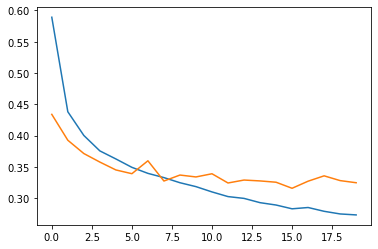

In [3]:
m = keras.Sequential()
m.add(keras.layers.Flatten(input_shape = (28, 28)))
m.add(keras.layers.Dense(100, activation = 'relu'))
m.add(keras.layers.Dropout(0.3))
m.add(keras.layers.Dense(10, activation = 'softmax'))
m.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')
ck_p = keras.callbacks.ModelCheckpoint('best_m.h5', save_best_only = True)  # 학습 도중에 가장 결과값이 좋을 때의 모델을 저장
hy = m.fit(t_x, t_y, epochs = 20, validation_data = (v_x, v_y), callbacks = [ck_p]) 
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

In [4]:
m2 = keras.models.load_model('best_m.h5')
m.evaluate(v_x, v_y)

375/375 [==============================] - 0s 1ms/step - loss: 0.3246 - accuracy: 0.8845


[0.32464003562927246, 0.8845000267028809]

In [5]:
m2.evaluate(v_x, v_y)

375/375 [==============================] - 0s 904us/step - loss: 0.3158 - accuracy: 0.8860


[0.31579387187957764, 0.8859999775886536]

In [6]:
m3 = my_m([
    keras.layers.Dense(100, activation = 'relu'), 
    keras.layers.Dropout(0.3)
])

ck_p = keras.callbacks.ModelCheckpoint('best1_m.h5', save_best_only = True)
e_st = keras.callbacks.EarlyStopping(patience = 3) # 평가점수 그래프가 3번 연속으로 발산하면 학습을 멈춤
m3.fit(t_x, t_y, epochs = 20, validation_data = (v_x, v_y), callbacks = [ck_p, e_st])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5956 - accuracy: 0.7895 - val_loss: 0.4261 - val_accuracy: 0.8444
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4444 - accuracy: 0.8403 - val_loss: 0.3937 - val_accuracy: 0.8574
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4081 - accuracy: 0.8513 - val_loss: 0.3696 - val_accuracy: 0.8636
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3831 - accuracy: 0.8603 - val_loss: 0.3655 - val_accuracy: 0.8674
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3706 - accuracy: 0.8652 - val_loss: 0.3463 - val_accuracy: 0.8701
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3562 - accuracy: 0.8692 - val_loss: 0.3381 - val_accuracy: 0.8767
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3466 - accuracy: 0.8724 - val_loss: 0.3318 - val_accuracy:

In [7]:
m3.evaluate(v_x, v_y)

375/375 [==============================] - 0s 976us/step - loss: 0.3221 - accuracy: 0.8827


[0.3221418559551239, 0.8826666474342346]

In [8]:
m4 = my_m([
    keras.layers.Dense(100, activation = 'relu'), 
    keras.layers.Dropout(0.3)
])

ck_p = keras.callbacks.ModelCheckpoint('best2_m.h5', save_best_only = True)
e_st = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)
# 평가점수 그래프가 3번 연속으로 발산하면 학습을 멈춤
# 멈춘 시점부터 처음까지 가장 좋은 가중치 값으로 기록
m4.fit(t_x, t_y, epochs = 20, validation_data = (v_x, v_y), callbacks = [ck_p, e_st])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5950 - accuracy: 0.7896 - val_loss: 0.4553 - val_accuracy: 0.8346
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4421 - accuracy: 0.8402 - val_loss: 0.3857 - val_accuracy: 0.8589
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4026 - accuracy: 0.8532 - val_loss: 0.3699 - val_accuracy: 0.8650
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3825 - accuracy: 0.8628 - val_loss: 0.3594 - val_accuracy: 0.8683
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3664 - accuracy: 0.8654 - val_loss: 0.3500 - val_accuracy: 0.8708
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3540 - accuracy: 0.8690 - val_loss: 0.3418 - val_accuracy: 0.8737
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3430 - accuracy: 0.8740 - val_loss: 0.3529 - val_accuracy:

In [9]:
m4.evaluate(v_x, v_y)

375/375 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8843


[0.31886282563209534, 0.8843333125114441]

In [10]:
def sig(x):
    return 1 / (1 + np.exp(-x))

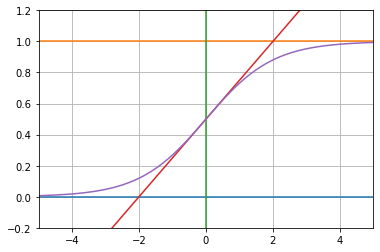

In [16]:
x = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0])
plt.plot([-5, 5], [1, 1])
plt.plot([0, 0], [-0.2, 1.2])
plt.plot([-5, 5], [-3 / 4, 7 / 4])
plt.plot(x, sig(x))
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])
plt.show()